In [21]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import time

plt.rcParams.update({'font.size': 18})

In [22]:
def h5filespec(h5_file):
    print ("Reading",h5_file)
    with h5py.File(h5_file, 'r') as hf: 
        fc = hf["data"].attrs['fc']
        fs = hf["data"].attrs['fs']
        c  = hf["data"].attrs['c']
        NFFT = int(hf["data"].attrs['NFFT'])
        len_data = hf["data/timestamps"][()].shape[0]
        print (len_data)
        auto11 = hf["data/auto11"][()]
        auto22 = hf["data/auto22"][()]
        cross12 = hf["data/cross12"][()]
    freqs = np.fft.fftshift(np.fft.fftfreq(NFFT, 1/fs)+fc)
    return freqs, auto11, auto22, cross12

In [23]:
# h5_filename= "20240323-200833_plutospec.h5"
h5_filename = "20240323-200720_plutospec.h5"

freqs, auto11, auto22, cross12 = h5filespec(h5_filename)

Reading 20240323-200720_plutospec.h5
600


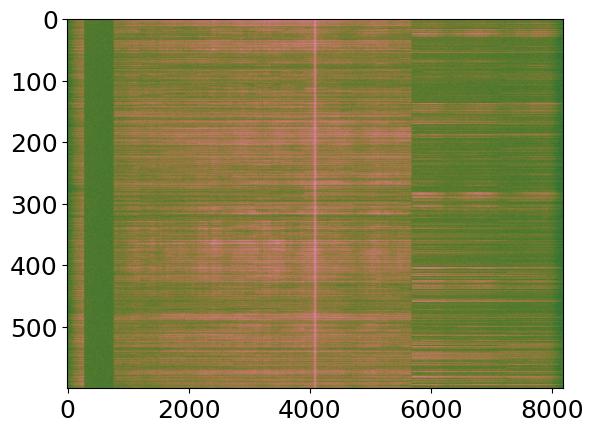

In [28]:
plt.figure()
plt.imshow(np.log(np.abs(auto22)), aspect='auto', cmap='cubehelix')

Text(0.5, 0, 'Freq (MHz)')

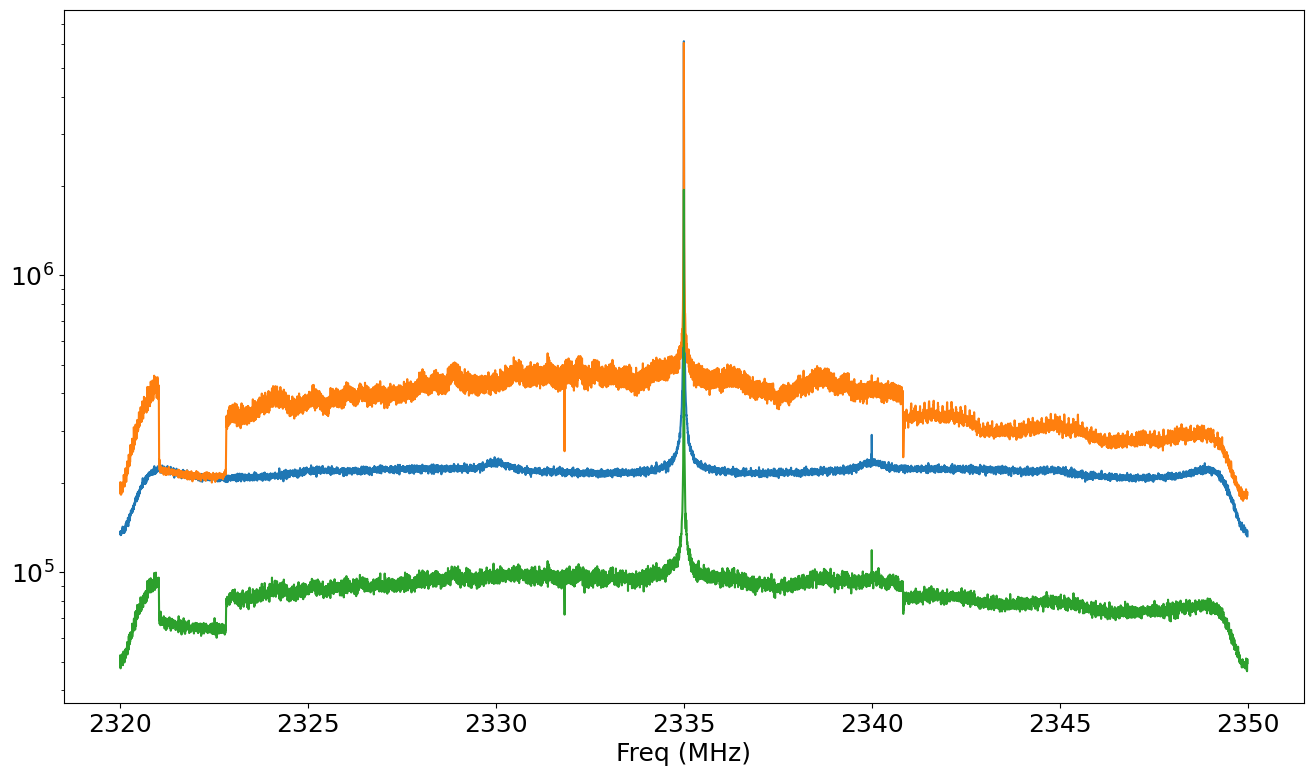

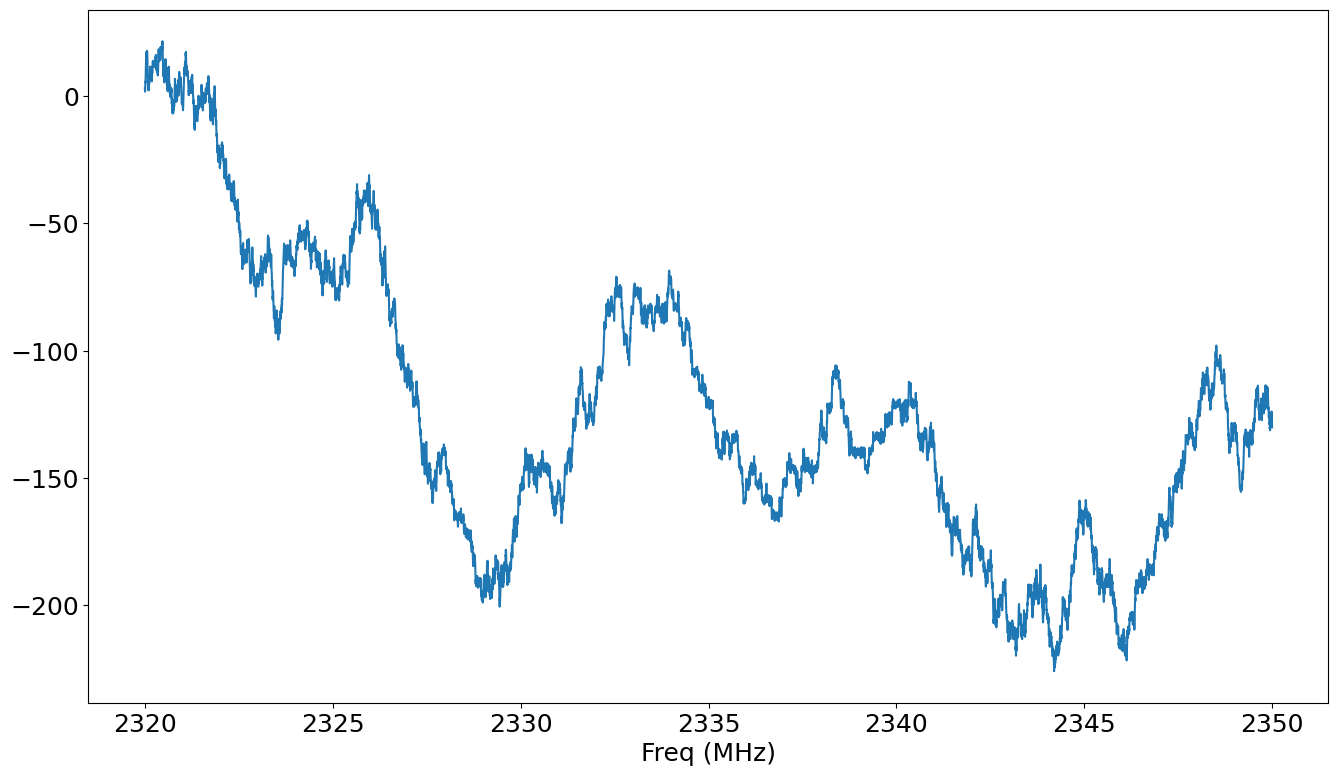

In [27]:
plt.figure(figsize=(16,9))
plt.semilogy(freqs/1e6, np.mean(np.abs(auto11), axis=0))
plt.semilogy(freqs/1e6, np.mean(np.abs(auto22), axis=0))
plt.semilogy(freqs/1e6, np.mean(np.abs(cross12), axis=0))
plt.xlabel("Freq (MHz)")

plt.figure(figsize=(16,9))
plt.plot(freqs/1e6, np.unwrap(np.angle(np.mean(cross12, axis=0))))
plt.xlabel("Freq (MHz)")